In [1]:
!apt install -y --allow-unauthenticated apt-transport-https ca-certificates

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  apt-transport-https
The following packages will be upgraded:
  ca-certificates
1 upgraded, 1 newly installed, 0 to remove and 83 not upgraded.
Need to get 192 kB of archives.
After this operation, 240 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu/ trusty-updates/main apt-transport-https amd64 1.0.1ubuntu2.24 [25.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu/ trusty-updates/main ca-certificates all 20170717~14.04.2 [166 kB]
Fetched 192 kB in 0s (386 kB/s)         
Preconfiguring packages ...

Selecting previously unselected package apt-transport-https.
(Reading database ... 26824 files and directories currently installed.)
Preparing to unpack .../apt-transport-https_1.0.1ubuntu2.24_amd64.deb ...
Progress: [  0%] [..........................................................] Progress: [ 10%] [######................

In [2]:
!apt update && apt install -y libgl1-mesa-glx

Ign http://archive.ubuntu.com trusty InRelease                                 
Get:1 http://archive.ubuntu.com trusty-updates InRelease [56.5 kB]             
Get:2 http://archive.ubuntu.com trusty-backports InRelease [56.5 kB]           
Get:3 http://security.ubuntu.com trusty-security InRelease [56.5 kB]           
Ign http://developer.download.nvidia.com  InRelease                            
Hit http://developer.download.nvidia.com  Release.gpg
Hit http://archive.ubuntu.com trusty Release.gpg     
Hit http://developer.download.nvidia.com  Release    
Hit http://archive.ubuntu.com trusty Release         
Get:4 http://archive.ubuntu.com trusty-updates/universe Sources [435 kB]
Get:5 http://archive.ubuntu.com trusty-updates/main amd64 Packages [1461 kB]
Get:6 http://archive.ubuntu.com trusty-updates/restricted amd64 Packages [28.8 kB]
Get:7 http://archive.ubuntu.com trusty-updates/universe amd64 Packages [883 kB]
Get:8 http://archive.ubuntu.com trusty-updates/multiverse amd64 Package

Progress: [ 18%] [###########...............................................] Progress: [ 20%] [############..............................................] Selecting previously unselected package libgl1-mesa-dri:amd64.
Preparing to unpack .../libgl1-mesa-dri_10.1.3-0ubuntu0.6_amd64.deb ...
Progress: [ 21%] [#############.............................................] Unpacking libgl1-mesa-dri:amd64 (10.1.3-0ubuntu0.6) ...
Progress: [ 22%] [#############.............................................] Progress: [ 23%] [##############............................................] Selecting previously unselected package libglapi-mesa:amd64.
Preparing to unpack .../libglapi-mesa_10.1.3-0ubuntu0.6_amd64.deb ...
Progress: [ 24%] [###############...........................................] Unpacking libglapi-mesa:amd64 (10.1.3-0ubuntu0.6) ...
Progress: [ 25%] [###############...........................................] Progress: [ 26%] [################..........................................] 

Progress: [ 78%] [##############################################............] Progress: [ 80%] [###############################################...........] Setting up libxcb-dri2-0:amd64 (1.10-2ubuntu1) ...
Progress: [ 81%] [################################################..........] Progress: [ 82%] [################################################..........] Setting up libxcb-dri3-0:amd64 (1.10-2ubuntu1) ...
Progress: [ 83%] [#################################################.........] Progress: [ 84%] [#################################################.........] Setting up libxcb-glx0:amd64 (1.10-2ubuntu1) ...
Progress: [ 85%] [##################################################........] Progress: [ 86%] [###################################################.......] Setting up libxcb-present0:amd64 (1.10-2ubuntu1) ...
Progress: [ 87%] [###################################################.......] Progress: [ 88%] [####################################################......] Setting up libxc

In [3]:
!pip install opencv-python==4.5.5.64

     |####                            | 7.8 MB 23.9 MB/s eta 0:00:03

     |#######                         | 13.5 MB 23.9 MB/s eta 0:00:02

     |##########                      | 19.2 MB 23.9 MB/s eta 0:00:02

     |#############                   | 25.0 MB 23.9 MB/s eta 0:00:02

     |################                | 30.8 MB 23.9 MB/s eta 0:00:02

     |###################             | 36.4 MB 23.9 MB/s eta 0:00:02

     |######################          | 42.2 MB 23.9 MB/s eta 0:00:01

     |#########################       | 47.9 MB 23.9 MB/s eta 0:00:01

     |############################    | 53.7 MB 23.9 MB/s eta 0:00:01

     |############################### | 59.4 MB 23.9 MB/s eta 0:00:01

     |################################| 60.5 MB 23.9 MB/s eta 0:00:01


In [4]:
from numba import cuda, types as numba_types
import numpy as np
import math
import cv2

In [5]:
def gaussian_kernel(size, sigma):
    splits = np.linspace(-size // 2, size // 2, size)
    x, y = np.meshgrid(splits, splits)
    kernel = np.exp(-(x**2 + y**2) / (2. * sigma**2))
    kernel = kernel / np.sum(kernel)
    return kernel.astype(np.float32)

In [6]:
KERNEL_RADIUS = 4
SIGMA = 2.0
KERNEL_SIZE = 2 * KERNEL_RADIUS + 1

kernel = gaussian_kernel(KERNEL_SIZE, SIGMA)
kernel

array([[9.9752637e-05, 3.4749156e-04, 8.8216661e-04, 1.6320879e-03,
        2.2005078e-03, 2.1621650e-03, 1.5482507e-03, 8.0794207e-04,
        3.0725976e-04],
       [3.4749156e-04, 1.2104982e-03, 3.0730562e-03, 5.6854310e-03,
        7.6655410e-03, 7.5319726e-03, 5.3933817e-03, 2.8144924e-03,
        1.0703494e-03],
       [8.8216661e-04, 3.0730562e-03, 7.8014778e-03, 1.4433438e-02,
        1.9460285e-02, 1.9121198e-02, 1.3692020e-02, 7.1450695e-03,
        2.7172645e-03],
       [1.6320879e-03, 5.6854310e-03, 1.4433438e-02, 2.6703160e-02,
        3.6003280e-02, 3.5375942e-02, 2.5331471e-02, 1.3219023e-02,
        5.0271843e-03],
       [2.2005078e-03, 7.6655410e-03, 1.9460285e-02, 3.6003280e-02,
        4.8542425e-02, 4.7696598e-02, 3.4153864e-02, 1.7822916e-02,
        6.7780414e-03],
       [2.1621650e-03, 7.5319726e-03, 1.9121198e-02, 3.5375942e-02,
        4.7696598e-02, 4.6865508e-02, 3.3558749e-02, 1.7512361e-02,
        6.6599371e-03],
       [1.5482507e-03, 5.3933817e-03, 1.

In [22]:
@cuda.jit
def gaussian_blur(input_img, output_img, kernel, width, height, ksize):
    half = ksize // 2

    start_x, start_y = cuda.grid(2)
    stride_x, stride_y = cuda.gridsize(2)

    for y in range(start_y, height, stride_y):
        for x in range(start_x, width, stride_x):
            for c in range(3):
                acc = np.float32(0.0)
                for ky in range(-half, half + 1):
                    if y + ky > width - 1 or y + ky < 0:
                            iy = y 
                    else:
                         iy = min(max(y + ky, 0), height - 1)
                    for kx in range(-half, half + 1):
                        if x + kx > width - 1 or x + kx < 0:
                            ix = x 
                        else:
                            ix = min(max(x + kx, 0), width - 1)
                        acc += np.float32(input_img[iy, ix, c]) * kernel[ky + half, kx + half]

                output_img[y, x, c] = acc

In [8]:
from numba import njit, prange

@njit
def gaussian_blur_cpu(input_img, output_img, kernel, width, height, ksize):
    half = ksize // 2

    for y in prange(height):
        for x in range(width):
            for c in range(3):
                acc = np.float32(0.0)
                for ky in range(-half, half + 1):
                    iy = min(max(y + ky, 0), height - 1)
                    for kx in range(-half, half + 1):
                        ix = min(max(x + kx, 0), width - 1)
                        acc += np.float32(input_img[iy, ix, c]) * np.float32(kernel[ky + half, kx + half])
                output_img[y, x, c] = acc


In [9]:
import requests

def download_image_to_array(url):
    headers = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/142.0.0.0 Safari/537.36"}
    resp = requests.get(url, headers=headers)
    resp.raise_for_status()
    img_array = np.asarray(bytearray(resp.content), dtype=np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    if img is None:
        raise ValueError("err ;(")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

url = "https://i.sstatic.net/4BxDj.jpg"
image = download_image_to_array(url)
h, w, _ = image.shape
h, w

(802, 1200)

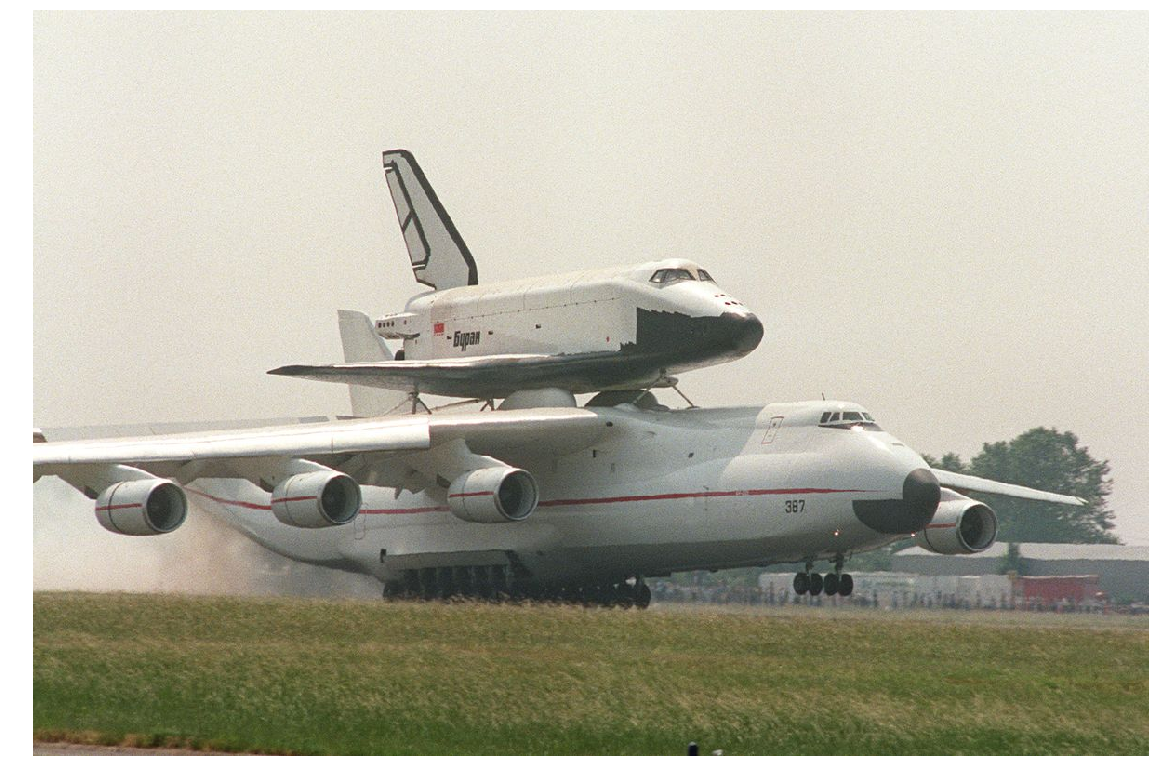

In [14]:
%matplotlib inline

from matplotlib import pyplot as plt

plt.figure(figsize=(20, 20))
plt.imshow(image)
plt.axis("off")
plt.show()

In [10]:
d_input = cuda.to_device(image)
d_output = cuda.device_array_like(image)
d_kernel = cuda.to_device(kernel)

In [23]:
threads = (16, 16)
blocks = (math.ceil(w / threads[0]), math.ceil(h / threads[1]))

gaussian_blur[blocks, threads](d_input, d_output, d_kernel, w, h, KERNEL_SIZE)
blurred = d_output.copy_to_host()

In [16]:
%timeit gaussian_blur[blocks, threads](d_input, d_output, d_kernel, w, h, KERNEL_SIZE)

1.76 ms ± 8.87 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [17]:
out = np.zeros_like(image)
%timeit gaussian_blur_cpu(image, out, kernel, w, h, KERNEL_SIZE)

452 ms ± 92.8 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


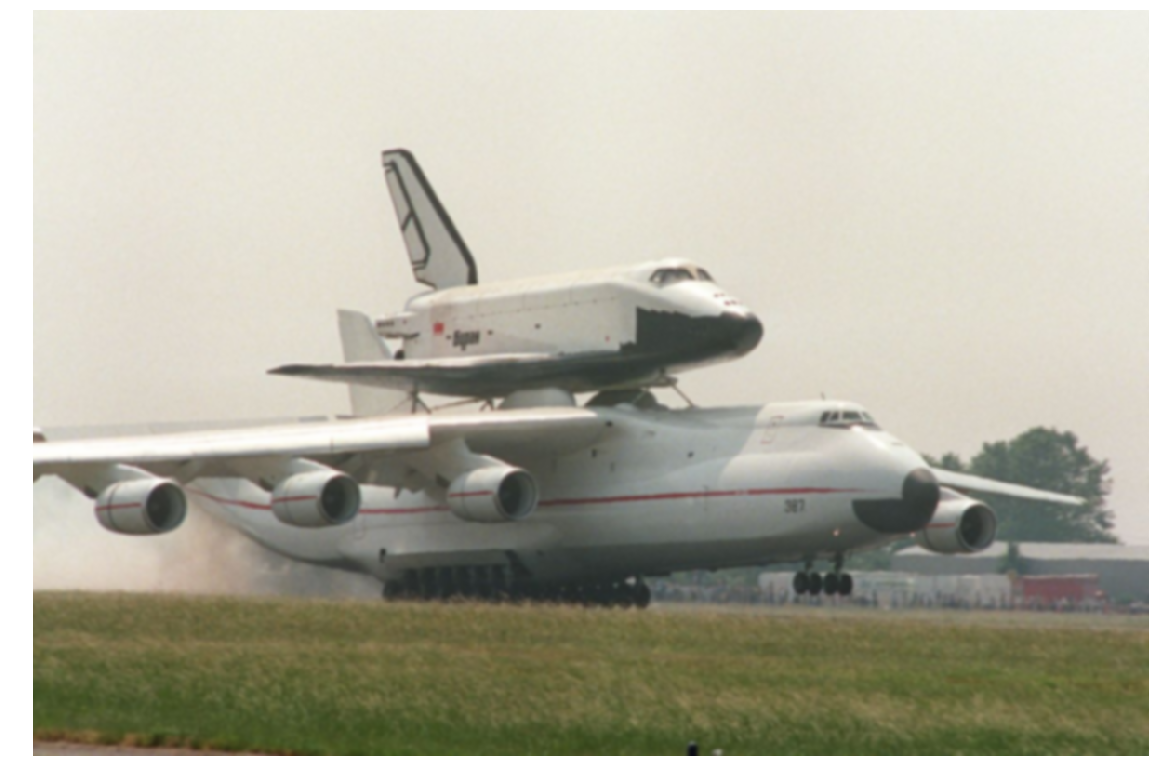

In [24]:
%matplotlib inline

from matplotlib import pyplot as plt

plt.figure(figsize=(20, 20))
plt.imshow(blurred)
plt.axis("off")
plt.show()

In [ ]:
!nvidia-smi